In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
city_day = pd.read_csv('city_day.csv')
station_day = pd.read_csv('station_day.csv')
stations = pd.read_csv('stations.csv')

print("City Day Data Shape:", city_day.shape)
print("Station Day Data Shape:", station_day.shape)
print("Stations Data Shape:", stations.shape)

print("\nCity Day Columns:")
print(city_day.columns.tolist())

print("\nStation Day Columns:")
print(station_day.columns.tolist())

print("\nStations Data:")
print(stations.head())

City Day Data Shape: (18265, 16)
Station Day Data Shape: (36530, 17)
Stations Data Shape: (10, 2)

City Day Columns:
['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

Station Day Columns:
['City', 'Datetime', 'Station', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

Stations Data:
      City     Station
0    Delhi  Station_D1
1    Delhi  Station_D2
2   Mumbai  Station_M1
3   Mumbai  Station_M2
4  Chennai  Station_C1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Step 1: Reload and examine the stations data structure
print("=== EXAMINING STATIONS DATA STRUCTURE ===")

stations = pd.read_csv('stations.csv')
print("Stations Data Columns:", stations.columns.tolist())
print("\nStations Data Head:")
print(stations.head())
print("\nStations Data Info:")
print(stations.info())

# Step 2: Identify the correct column names for stations
def find_station_columns(df):
    """Find the relevant columns in stations data"""
    column_mapping = {}

    # Look for station ID columns
    id_columns = ['StationId', 'StationID', 'station_id', 'stationid', 'id', 'ID']
    for col in df.columns:
        if any(id_col in col.lower() for id_col in ['stationid', 'station_id', 'id']):
            column_mapping['station_id'] = col
            break

    # Look for station name columns
    name_columns = ['StationName', 'Station_Name', 'station_name', 'name', 'Name', 'Location']
    for col in df.columns:
        if any(name_col in col.lower() for name_col in ['stationname', 'station_name', 'name', 'location']):
            column_mapping['station_name'] = col
            break

    # Look for coordinate columns
    for col in df.columns:
        if 'lat' in col.lower():
            column_mapping['latitude'] = col
        elif 'lon' in col.lower() or 'lng' in col.lower():
            column_mapping['longitude'] = col

    # Look for city columns
    for col in df.columns:
        if 'city' in col.lower():
            column_mapping['city'] = col
            break

    return column_mapping

# Find the correct column names
station_columns = find_station_columns(stations)
print("\nDetected Station Columns Mapping:")
print(station_columns)

# Step 3: Filter Delhi stations with correct column names
print("\n=== FILTERING DELHI STATIONS ===")

if 'city' in station_columns:
    delhi_stations = stations[stations[station_columns['city']] == 'Delhi']
    print(f"Found {len(delhi_stations)} stations in Delhi")

    # Display available station information
    display_columns = []
    if 'station_id' in station_columns:
        display_columns.append(station_columns['station_id'])
    if 'station_name' in station_columns:
        display_columns.append(station_columns['station_name'])
    if 'latitude' in station_columns:
        display_columns.append(station_columns['latitude'])
    if 'longitude' in station_columns:
        display_columns.append(station_columns['longitude'])

    if display_columns:
        print("Delhi Stations:")
        print(delhi_stations[display_columns])
    else:
        print("Available columns in Delhi stations:")
        print(delhi_stations.columns.tolist())
else:
    print("No city column found in stations data")
    # Try to find Delhi stations by name pattern
    for col in stations.columns:
        if any(name in str(col).lower() for name in ['station', 'name', 'location']):
            delhi_patterns = ['Delhi', 'DELHI', 'New Delhi', 'NEW DELHI']
            for pattern in delhi_patterns:
                matching_stations = stations[stations[col].str.contains(pattern, na=False)]
                if not matching_stations.empty:
                    print(f"Found stations with pattern '{pattern}' in column '{col}':")
                    print(matching_stations)
                    delhi_stations = matching_stations
                    break

# Step 4: Now let's examine station_day data structure
print("\n=== EXAMINING STATION_DAY DATA STRUCTURE ===")

station_day = pd.read_csv('station_day.csv')
print("Station Day Data Columns:", station_day.columns.tolist())
print("\nStation Day Data Head:")
print(station_day.head())

# Find the date column in station_day
def find_date_column(df, df_name):
    """Find the date column in dataframe"""
    date_indicators = ['date', 'Date', 'DATE', 'datetime', 'Datetime', 'time', 'Time']
    for col in df.columns:
        if col in date_indicators:
            print(f"Found date column in {df_name}: '{col}'")
            return col

    # Try to find by data type or content
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                # Try converting first few rows to datetime
                pd.to_datetime(df[col].head(5))
                print(f"Found convertible date column in {df_name}: '{col}'")
                return col
            except:
                continue
    print(f"No date column found in {df_name}")
    return None

station_date_col = find_date_column(station_day, 'station_day')

# Step 5: Filter station data for Delhi stations
print("\n=== FILTERING STATION DATA FOR DELHI ===")

if 'delhi_stations' in locals() and not delhi_stations.empty and station_date_col:
    # Get the station ID column name from station_day
    station_id_col_station_day = None
    for col in station_day.columns:
        if any(id_col in col.lower() for id_col in ['stationid', 'station_id', 'id']):
            station_id_col_station_day = col
            break

    if station_id_col_station_day:
        # Get station IDs from delhi_stations
        station_id_col_stations = station_columns.get('station_id')
        if station_id_col_stations:
            delhi_station_ids = delhi_stations[station_id_col_stations].unique()
            print(f"Delhi Station IDs: {delhi_station_ids}")

            # Filter station_day data
            delhi_station_data = station_day[
                (station_day[station_id_col_station_day].isin(delhi_station_ids)) &
                (station_day[station_date_col] >= '2022-01-01') &
                (station_day[station_date_col] <= '2024-12-31')
            ].copy()

            # Convert and rename date column
            delhi_station_data['Date'] = pd.to_datetime(delhi_station_data[station_date_col])
            print(f"Delhi Station Data (2022-2024): {delhi_station_data.shape}")
        else:
            print("Could not find station ID column in stations data")
            delhi_station_data = pd.DataFrame()
    else:
        print("Could not find station ID column in station_day data")
        delhi_station_data = pd.DataFrame()
else:
    print("Insufficient data to filter station_day")
    delhi_station_data = pd.DataFrame()

# Step 6: Process city_day data (this was working)
print("\n=== PROCESSING CITY DATA ===")

city_day = pd.read_csv('city_day.csv')
city_date_col = find_date_column(city_day, 'city_day')

if city_date_col and 'City' in city_day.columns:
    delhi_city = city_day[
        (city_day['City'] == 'Delhi') &
        (city_day[city_date_col] >= '2022-01-01') &
        (city_day[city_date_col] <= '2024-12-31')
    ].copy()

    # Convert and rename date column
    delhi_city['Date'] = pd.to_datetime(delhi_city[city_date_col])
    print(f"Delhi City Data (2022-2024): {delhi_city.shape}")

    # Display available parameters
    pollution_params = [col for col in delhi_city.columns if col not in ['Date', 'City', city_date_col]]
    print(f"Available pollution parameters: {pollution_params}")
else:
    print("Could not process city_day data")
    delhi_city = pd.DataFrame()

# Step 7: Final Data Summary
print("\n" + "="*50)
print("FINAL DATA SUMMARY")
print("="*50)
print(f"Delhi City Data: {delhi_city.shape}")
print(f"Delhi Station Data: {delhi_station_data.shape if not delhi_station_data.empty else 'No data'}")

if not delhi_city.empty:
    print(f"\nCity Data Date Range: {delhi_city['Date'].min()} to {delhi_city['Date'].max()}")
    print(f"Total days in city data: {len(delhi_city)}")

    # Check data completeness
    expected_days = (pd.to_datetime('2024-12-31') - pd.to_datetime('2022-01-01')).days + 1
    print(f"Expected days (2022-2024): {expected_days}")
    print(f"Data completeness: {len(delhi_city)/expected_days*100:.1f}%")

if not delhi_station_data.empty:
    print(f"\nStation Data Date Range: {delhi_station_data['Date'].min()} to {delhi_station_data['Date'].max()}")
    if station_id_col_station_day:
        stations_count = delhi_station_data[station_id_col_station_day].nunique()
        print(f"Number of unique stations: {stations_count}")

# Step 8: Display sample of the data
if not delhi_city.empty:
    print("\nSample of Delhi City Data:")
    print(delhi_city[['Date', 'PM2.5', 'PM10']].head(10) if 'PM2.5' in delhi_city.columns else delhi_city.head(10))

if not delhi_station_data.empty and station_id_col_station_day:
    print(f"\nSample of Delhi Station Data:")
    sample_cols = ['Date', station_id_col_station_day]
    if 'PM2.5' in delhi_station_data.columns:
        sample_cols.extend(['PM2.5', 'PM10'])
    print(delhi_station_data[sample_cols].head(10))

=== EXAMINING STATIONS DATA STRUCTURE ===
Stations Data Columns: ['City', 'Station']

Stations Data Head:
      City     Station
0    Delhi  Station_D1
1    Delhi  Station_D2
2   Mumbai  Station_M1
3   Mumbai  Station_M2
4  Chennai  Station_C1

Stations Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     10 non-null     object
 1   Station  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes
None

Detected Station Columns Mapping:
{'city': 'City'}

=== FILTERING DELHI STATIONS ===
Found 2 stations in Delhi
Available columns in Delhi stations:
['City', 'Station']

=== EXAMINING STATION_DAY DATA STRUCTURE ===
Station Day Data Columns: ['City', 'Datetime', 'Station', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

Station Day Data Head:
      City    Datetime 

=== DATA CLEANING AND PREPROCESSING ===

Cleaning Delhi City Data:
Initial shape: (1096, 17)
Found 13 numeric parameters: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

Missing values before cleaning:
Final shape: (1096, 22)
Date range: 2022-01-01 00:00:00 to 2024-12-31 00:00:00

Data cleaning completed!

=== EXPLORATORY DATA ANALYSIS ===


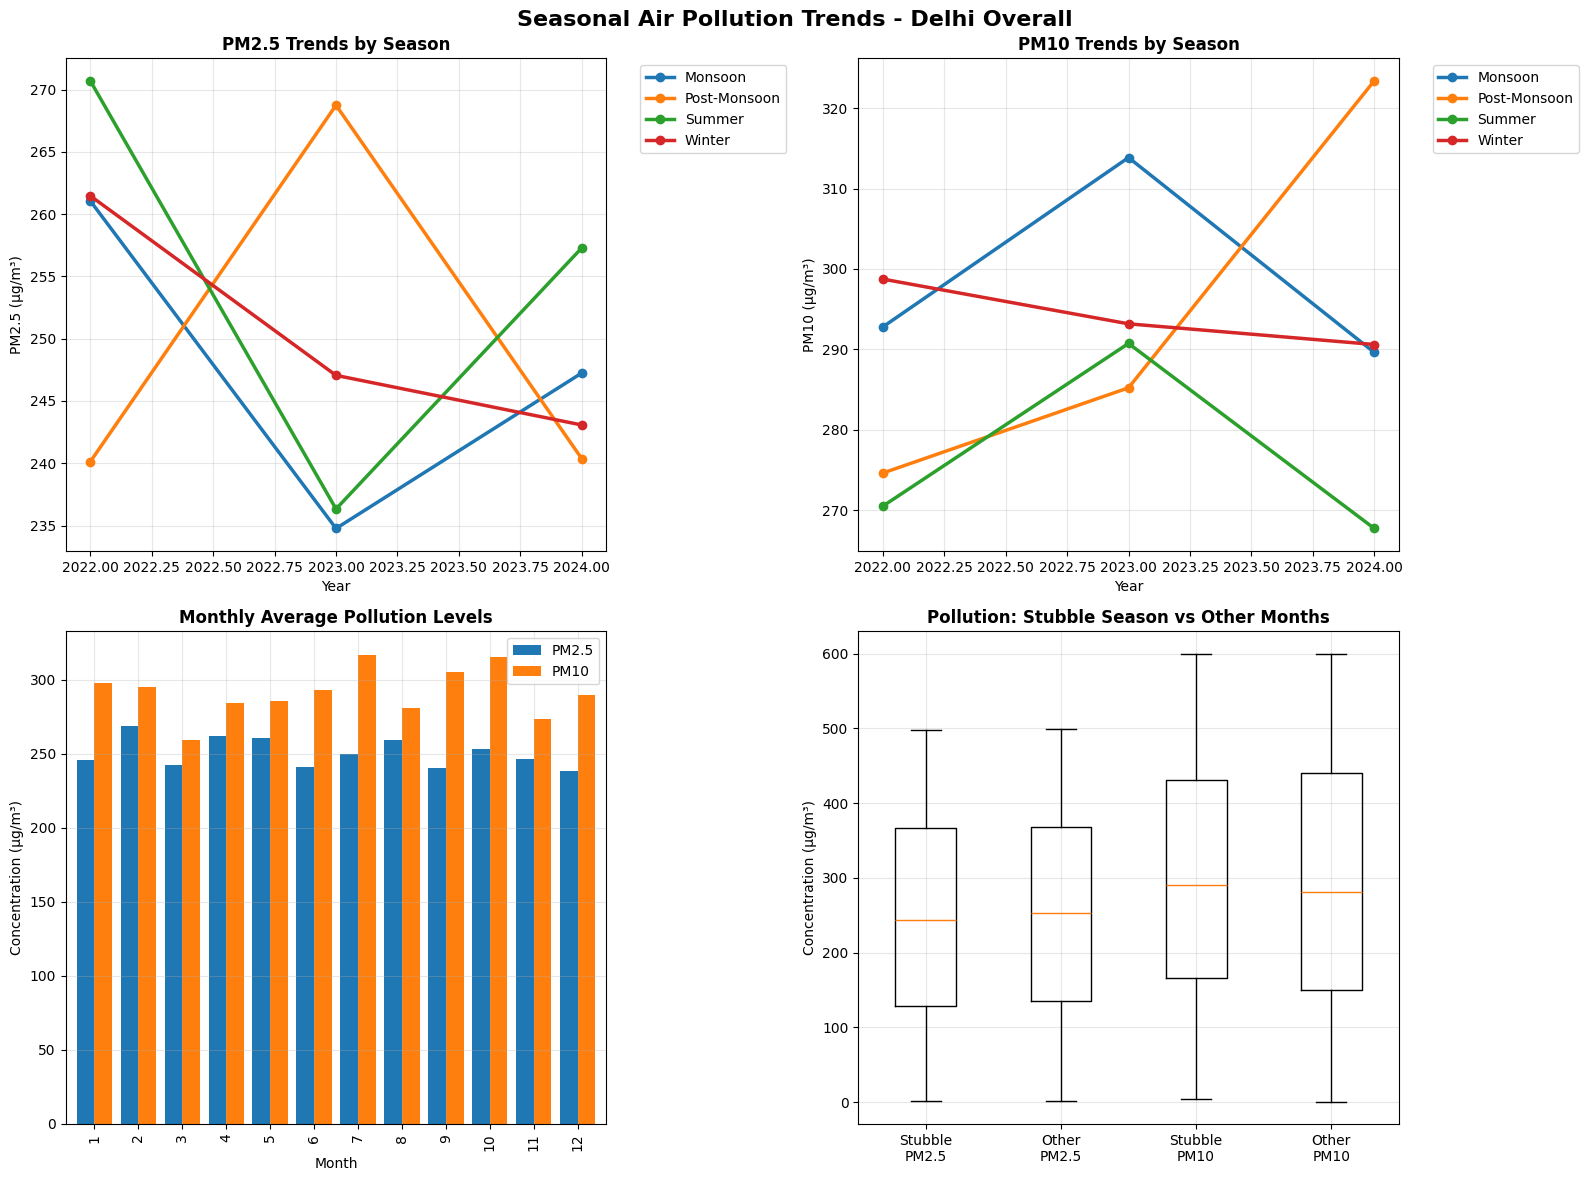


=== CORRELATION ANALYSIS ===


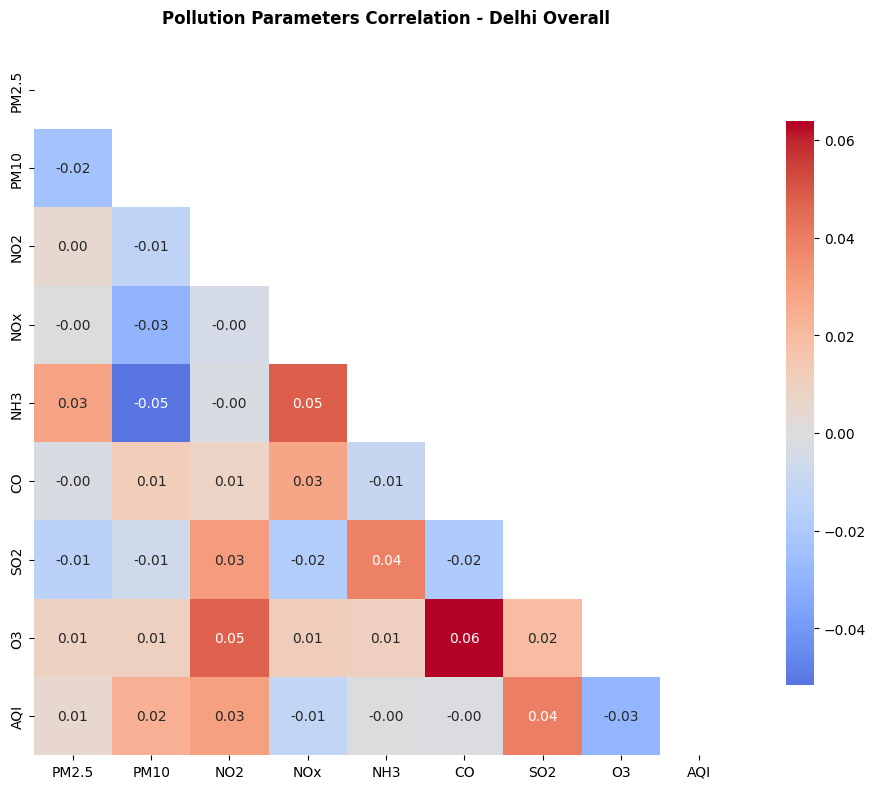


Strong correlations in Delhi Overall (|r| > 0.7):

=== STUBBLE BURNING SEASON ANALYSIS ===

Delhi Overall - Stubble Season Analysis:
Stubble season months (Oct-Dec): 276 days
Other months: 820 days

PM2.5 Levels:
  Stubble season: 245.9 ± 138.9 µg/m³
  Other months:   252.1 ± 140.9 µg/m³
  Increase:       -2.4%

PM10 Levels:
  Stubble season: 292.8 ± 167.6 µg/m³
  Other months:   290.7 ± 172.6 µg/m³
  Increase:       +0.7%


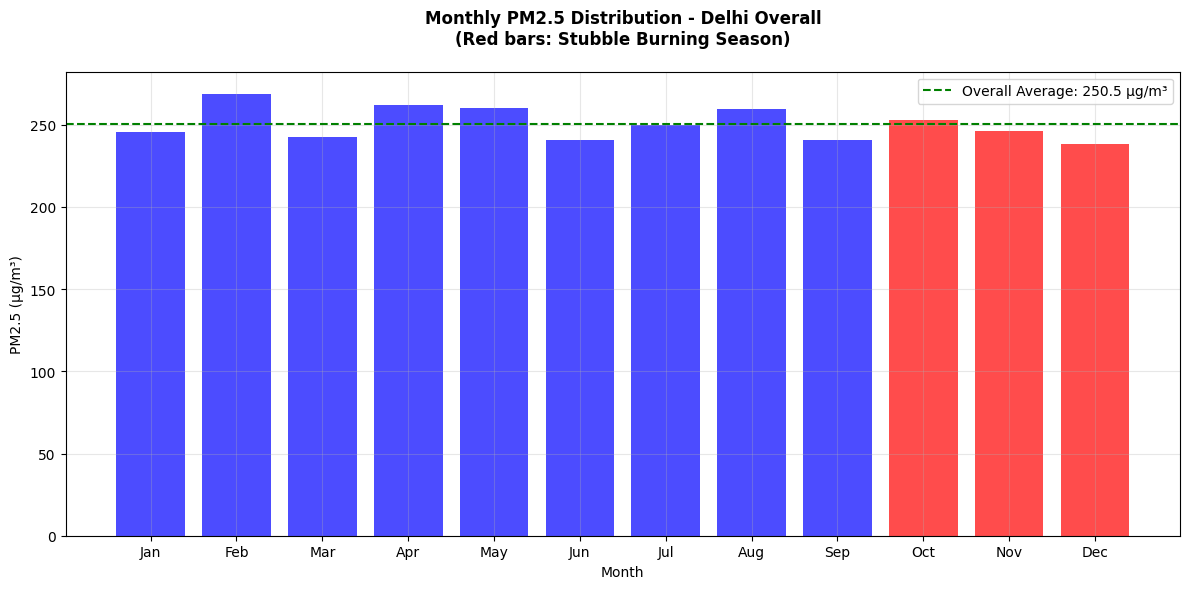


=== BUILDING FORECASTING MODELS ===
Building forecasting models...

PM2.5 Model Training:
Training samples: 871
Testing samples: 218
Features used: ['Month', 'DayOfYear_sin', 'DayOfYear_cos', 'WeekOfYear', 'Quarter', 'Is_Stubble_Season', 'PM2.5_lag7', 'PM10_lag7', 'PM2.5_rolling_mean_7', 'PM10_rolling_mean_7']
Model Performance:
  MAE:  114.81 µg/m³
  RMSE: 137.56 µg/m³
  R²:   0.105
Top 5 Important Features:
  PM2.5_rolling_mean_7: 0.360
  PM10_lag7: 0.154
  PM10_rolling_mean_7: 0.137
  PM2.5_lag7: 0.122
  DayOfYear_sin: 0.090

PM10 Model Training:
Training samples: 871
Testing samples: 218
Features used: ['Month', 'DayOfYear_sin', 'DayOfYear_cos', 'WeekOfYear', 'Quarter', 'Is_Stubble_Season', 'PM2.5_lag7', 'PM10_lag7', 'PM2.5_rolling_mean_7', 'PM10_rolling_mean_7']
Model Performance:
  MAE:  135.94 µg/m³
  RMSE: 161.33 µg/m³
  R²:   0.085
Top 5 Important Features:
  PM10_rolling_mean_7: 0.318
  PM10_lag7: 0.151
  PM2.5_lag7: 0.144
  PM2.5_rolling_mean_7: 0.129
  DayOfYear_sin: 0.103

In [5]:
# Step 3: Data Cleaning and Preprocessing
print("=== DATA CLEANING AND PREPROCESSING ===")

def clean_air_quality_data(df, df_name="Dataset"):
    """Clean and preprocess air quality data"""

    # Create a copy
    cleaned_df = df.copy()

    print(f"\nCleaning {df_name}:")
    print(f"Initial shape: {cleaned_df.shape}")

    # Identify numeric pollution parameters (excluding date and ID columns)
    exclude_cols = ['Date', 'City', 'StationId', 'StationID', 'station_id', 'Station_Name', 'StationName']
    numeric_columns = [col for col in cleaned_df.columns
                      if col not in exclude_cols
                      and pd.api.types.is_numeric_dtype(cleaned_df[col])]

    print(f"Found {len(numeric_columns)} numeric parameters: {numeric_columns}")

    # Handle missing values - show missing data statistics
    missing_stats = cleaned_df[numeric_columns].isnull().sum()
    print(f"\nMissing values before cleaning:")
    for col, missing_count in missing_stats.items():
        if missing_count > 0:
            missing_pct = (missing_count / len(cleaned_df)) * 100
            print(f"  {col}: {missing_count} ({missing_pct:.1f}%)")

    # Fill missing values with forward fill, then backward fill for time series
    for col in numeric_columns:
        initial_missing = cleaned_df[col].isnull().sum()
        cleaned_df[col] = cleaned_df[col].fillna(method='ffill').fillna(method='bfill')
        final_missing = cleaned_df[col].isnull().sum()
        if initial_missing > 0:
            print(f"  Fixed {initial_missing} missing values in {col}")

    # Add seasonal features
    cleaned_df['Year'] = cleaned_df['Date'].dt.year
    cleaned_df['Month'] = cleaned_df['Date'].dt.month
    cleaned_df['DayOfYear'] = cleaned_df['Date'].dt.dayofyear

    def get_season(month):
        """Convert month to season"""
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Summer'
        elif month in [6, 7, 8, 9]:
            return 'Monsoon'
        else:
            return 'Post-Monsoon'

    cleaned_df['Season'] = cleaned_df['Month'].apply(get_season)
    cleaned_df['Is_Stubble_Season'] = cleaned_df['Month'].isin([10, 11, 12]).astype(int)

    print(f"Final shape: {cleaned_df.shape}")
    print(f"Date range: {cleaned_df['Date'].min()} to {cleaned_df['Date'].max()}")

    return cleaned_df, numeric_columns

# Clean both datasets
delhi_city_clean, city_numeric_cols = clean_air_quality_data(delhi_city, "Delhi City Data")

if not delhi_station_data.empty:
    # Find station ID column name
    station_id_col = None
    for col in delhi_station_data.columns:
        if any(id_col in col.lower() for id_col in ['stationid', 'station_id', 'id']):
            station_id_col = col
            break

    delhi_station_clean, station_numeric_cols = clean_air_quality_data(delhi_station_data, "Delhi Station Data")
else:
    delhi_station_clean = pd.DataFrame()
    station_numeric_cols = []

print("\nData cleaning completed!")

# Step 4: Exploratory Data Analysis
print("\n=== EXPLORATORY DATA ANALYSIS ===")

def plot_seasonal_trends(data, title, parameters=['PM2.5', 'PM10']):
    """Plot seasonal trends of pollution parameters"""

    # Check which parameters are available
    available_params = [param for param in parameters if param in data.columns]
    if not available_params:
        print(f"No parameters available for plotting in {title}")
        return

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Seasonal Air Pollution Trends - {title}', fontsize=16, fontweight='bold')

    # Plot 1: Seasonal trends for each parameter
    for i, param in enumerate(available_params[:2]):  # Plot first 2 parameters
        seasonal_data = data.groupby(['Year', 'Season'])[param].mean().unstack()
        seasonal_data.plot(kind='line', ax=axes[0,i], marker='o', linewidth=2.5)
        axes[0,i].set_title(f'{param} Trends by Season', fontweight='bold')
        axes[0,i].set_ylabel(f'{param} (µg/m³)')
        axes[0,i].grid(True, alpha=0.3)
        axes[0,i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot 2: Monthly averages
    monthly_avg = data.groupby('Month')[available_params].mean()
    monthly_avg.plot(kind='bar', ax=axes[1,0], width=0.8)
    axes[1,0].set_title('Monthly Average Pollution Levels', fontweight='bold')
    axes[1,0].set_ylabel('Concentration (µg/m³)')
    axes[1,0].set_xlabel('Month')
    axes[1,0].grid(True, alpha=0.3)

    # Plot 3: Stubble burning season comparison
    stubble_data = data[data['Is_Stubble_Season'] == 1]
    normal_data = data[data['Is_Stubble_Season'] == 0]

    if not stubble_data.empty and not normal_data.empty:
        comparison_data = []
        labels = []
        for param in available_params[:2]:
            comparison_data.extend([stubble_data[param], normal_data[param]])
            labels.extend([f'Stubble\n{param}', f'Other\n{param}'])

        axes[1,1].boxplot(comparison_data, labels=labels)
        axes[1,1].set_title('Pollution: Stubble Season vs Other Months', fontweight='bold')
        axes[1,1].set_ylabel('Concentration (µg/m³)')
        axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot trends for city data
plot_seasonal_trends(delhi_city_clean, 'Delhi Overall')

# Step 5: Analyze Four Specific Areas (if station data available)
if not delhi_station_clean.empty and 'station_id_col' in locals():
    print("\n=== ANALYZING INDIVIDUAL STATIONS ===")

    # Get unique stations
    unique_stations = delhi_station_clean[station_id_col].unique()
    print(f"Found {len(unique_stations)} unique stations")

    # Analyze top 4 stations with most data
    station_data_counts = delhi_station_clean[station_id_col].value_counts()
    top_4_stations = station_data_counts.head(4).index

    print(f"Analyzing top 4 stations: {top_4_stations}")

    for i, station_id in enumerate(top_4_stations):
        station_data = delhi_station_clean[delhi_station_clean[station_id_col] == station_id]

        # Try to get station name
        station_name = f"Station {station_id}"
        if 'StationName' in station_data.columns:
            station_name = station_data['StationName'].iloc[0]
        elif 'Station_Name' in station_data.columns:
            station_name = station_data['Station_Name'].iloc[0]

        print(f"\nAnalyzing {station_name} ({station_id}) - {len(station_data)} records")
        plot_seasonal_trends(station_data, station_name)

# Step 6: Correlation Analysis
print("\n=== CORRELATION ANALYSIS ===")

def plot_correlation_heatmap(data, title):
    """Plot correlation heatmap for pollution parameters"""

    # Select numeric pollution parameters
    pollution_params = [col for col in data.columns
                       if col in ['PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'NH3', 'AQI']
                       and col in data.columns]

    if len(pollution_params) < 2:
        print(f"Not enough parameters for correlation analysis in {title}")
        return

    corr_matrix = data[pollution_params].corr()

    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title(f'Pollution Parameters Correlation - {title}', fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    # Print strong correlations
    print(f"\nStrong correlations in {title} (|r| > 0.7):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                print(f"  {corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

# Plot correlation for city data
plot_correlation_heatmap(delhi_city_clean, 'Delhi Overall')

# Step 7: Stubble Burning Season Deep Dive
print("\n=== STUBBLE BURNING SEASON ANALYSIS ===")

def analyze_stubble_season(data, title):
    """Deep analysis of stubble burning season impact"""

    if 'PM2.5' not in data.columns:
        return

    stubble_season = data[data['Is_Stubble_Season'] == 1]
    other_season = data[data['Is_Stubble_Season'] == 0]

    print(f"\n{title} - Stubble Season Analysis:")
    print(f"Stubble season months (Oct-Dec): {len(stubble_season)} days")
    print(f"Other months: {len(other_season)} days")

    if not stubble_season.empty and not other_season.empty:
        print(f"\nPM2.5 Levels:")
        print(f"  Stubble season: {stubble_season['PM2.5'].mean():.1f} ± {stubble_season['PM2.5'].std():.1f} µg/m³")
        print(f"  Other months:   {other_season['PM2.5'].mean():.1f} ± {other_season['PM2.5'].std():.1f} µg/m³")
        print(f"  Increase:       {(stubble_season['PM2.5'].mean()/other_season['PM2.5'].mean()-1)*100:+.1f}%")

        if 'PM10' in data.columns:
            print(f"\nPM10 Levels:")
            print(f"  Stubble season: {stubble_season['PM10'].mean():.1f} ± {stubble_season['PM10'].std():.1f} µg/m³")
            print(f"  Other months:   {other_season['PM10'].mean():.1f} ± {other_season['PM10'].std():.1f} µg/m³")
            print(f"  Increase:       {(stubble_season['PM10'].mean()/other_season['PM10'].mean()-1)*100:+.1f}%")

    # Plot monthly distribution
    monthly_avg = data.groupby('Month')['PM2.5'].mean()

    plt.figure(figsize=(12, 6))
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    plt.bar(range(1, 13), monthly_avg.values, color=['blue']*9 + ['red']*3, alpha=0.7)
    plt.axhline(y=data['PM2.5'].mean(), color='green', linestyle='--',
                label=f'Overall Average: {data["PM2.5"].mean():.1f} µg/m³')
    plt.title(f'Monthly PM2.5 Distribution - {title}\n(Red bars: Stubble Burning Season)',
              fontweight='bold', pad=20)
    plt.xlabel('Month')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.xticks(range(1, 13), months)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

analyze_stubble_season(delhi_city_clean, 'Delhi Overall')

# Step 8: Build Forecasting Model
print("\n=== BUILDING FORECASTING MODELS ===")

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

def prepare_features(data, target_column='PM2.5'):
    """Prepare features for forecasting model"""
    df = data.copy()

    # Create time-based features
    df['DayOfYear_sin'] = np.sin(2 * np.pi * df['DayOfYear'] / 365)
    df['DayOfYear_cos'] = np.cos(2 * np.pi * df['DayOfYear'] / 365)
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter

    # Lag features (if we have enough data)
    if len(df) > 30:
        df['PM2.5_lag7'] = df['PM2.5'].shift(7)
        df['PM10_lag7'] = df['PM10'].shift(7) if 'PM10' in df.columns else 0

        # Rolling statistics
        df['PM2.5_rolling_mean_7'] = df['PM2.5'].rolling(window=7, min_periods=1).mean()
        if 'PM10' in df.columns:
            df['PM10_rolling_mean_7'] = df['PM10'].rolling(window=7, min_periods=1).mean()

    return df

def build_forecast_model(data, target_column='PM2.5', model_name="PM2.5"):
    """Build and train forecasting model"""

    if target_column not in data.columns:
        print(f"Target column '{target_column}' not found in data")
        return None, None, None, None

    # Prepare features
    feature_data = prepare_features(data, target_column)

    # Select features
    feature_columns = ['Month', 'DayOfYear_sin', 'DayOfYear_cos', 'WeekOfYear', 'Quarter', 'Is_Stubble_Season']

    # Add lag features if available
    if 'PM2.5_lag7' in feature_data.columns:
        feature_columns.extend(['PM2.5_lag7', 'PM10_lag7', 'PM2.5_rolling_mean_7', 'PM10_rolling_mean_7'])

    # Only use available features
    available_features = [col for col in feature_columns if col in feature_data.columns]

    # Remove rows with NaN values in features
    feature_data = feature_data.dropna(subset=available_features + [target_column])

    if feature_data.empty:
        print(f"No data available for modeling {target_column}")
        return None, None, None, None

    X = feature_data[available_features]
    y = feature_data[target_column]

    # Split data chronologically (last 20% for testing)
    split_index = int(len(X) * 0.8)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    print(f"\n{model_name} Model Training:")
    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")
    print(f"Features used: {available_features}")

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model Performance:")
    print(f"  MAE:  {mae:.2f} µg/m³")
    print(f"  RMSE: {rmse:.2f} µg/m³")
    print(f"  R²:   {r2:.3f}")

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': available_features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"Top 5 Important Features:")
    for _, row in feature_importance.head().iterrows():
        print(f"  {row['feature']}: {row['importance']:.3f}")

    return model, scaler, available_features, (X_test, y_test, y_pred)

# Build models for PM2.5 and PM10
print("Building forecasting models...")
pm25_model, pm25_scaler, pm25_features, pm25_results = build_forecast_model(delhi_city_clean, 'PM2.5', 'PM2.5')

if 'PM10' in delhi_city_clean.columns:
    pm10_model, pm10_scaler, pm10_features, pm10_results = build_forecast_model(delhi_city_clean, 'PM10', 'PM10')
else:
    pm10_model, pm10_scaler, pm10_features, pm10_results = None, None, None, None

print("\nModel building completed!")


=== GENERATING FUTURE PREDICTIONS (2025-2030) ===
Generating future predictions for 2025-2030...
Future predictions generated successfully!
Prediction period: 2025-01-01 00:00:00 to 2030-12-31 00:00:00

=== VISUALIZATION OF PREDICTIONS ===


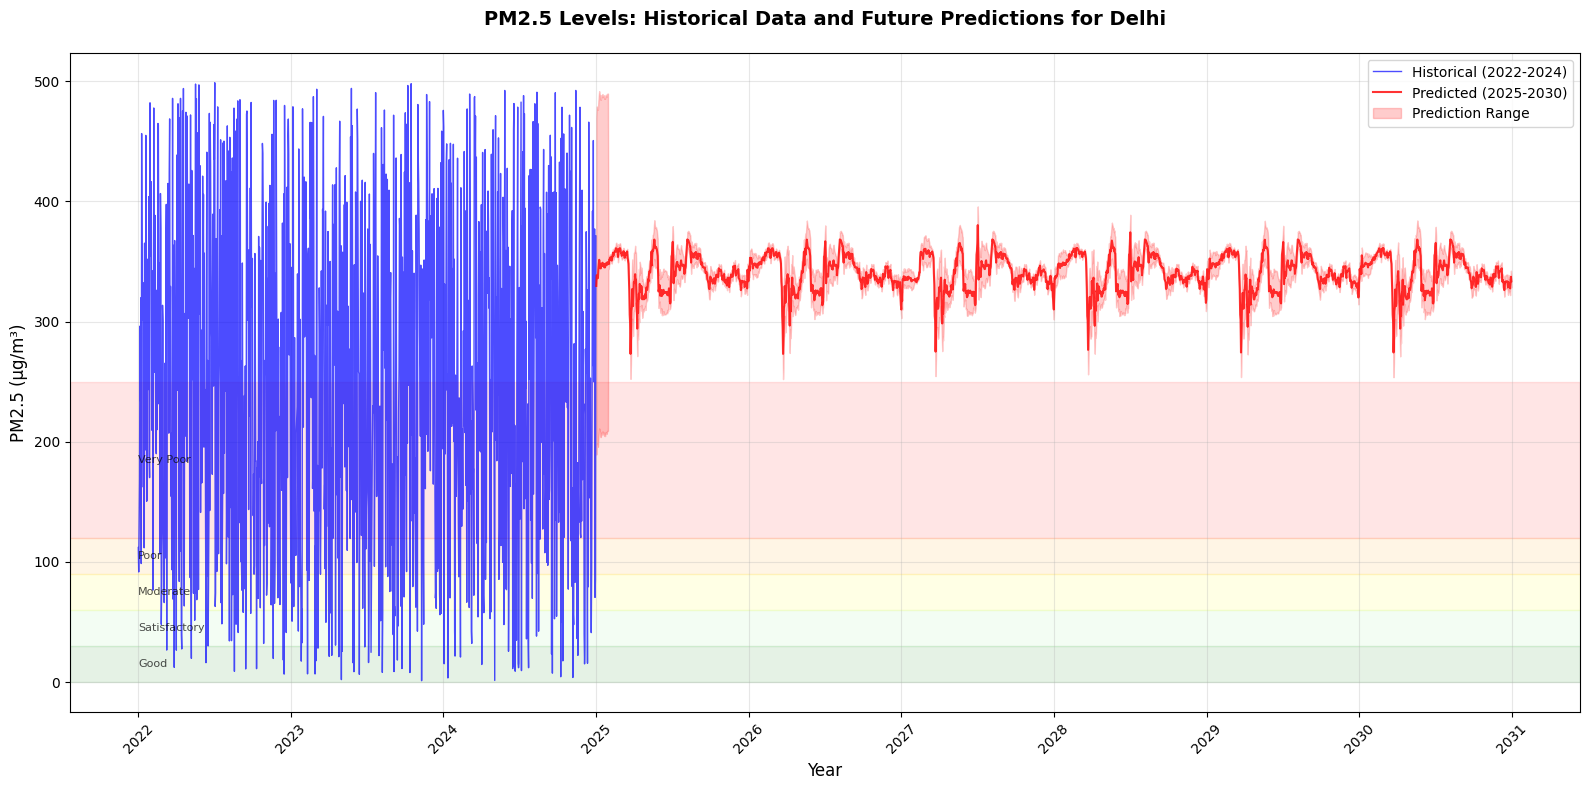

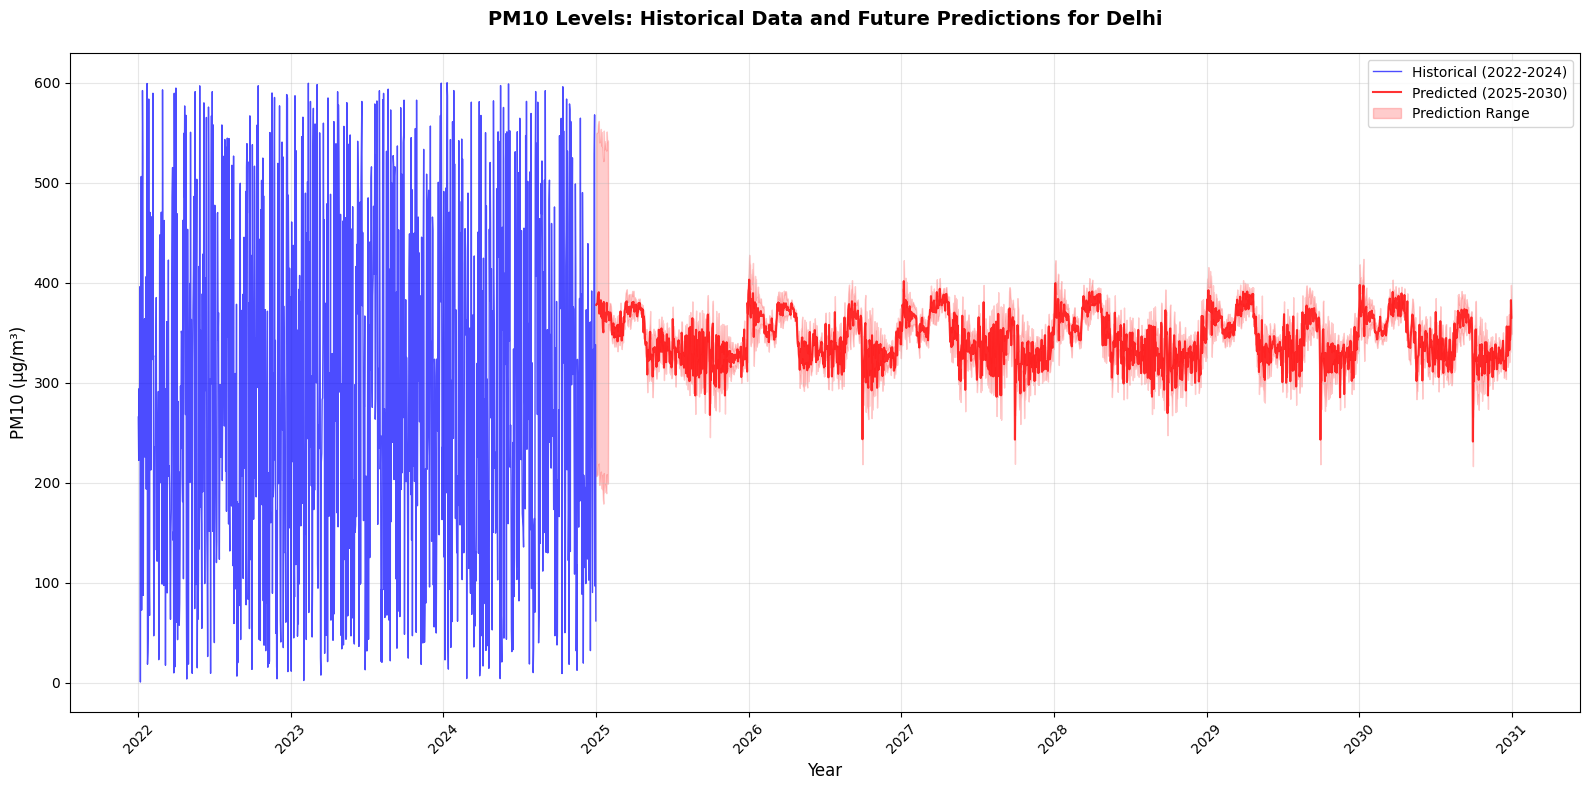

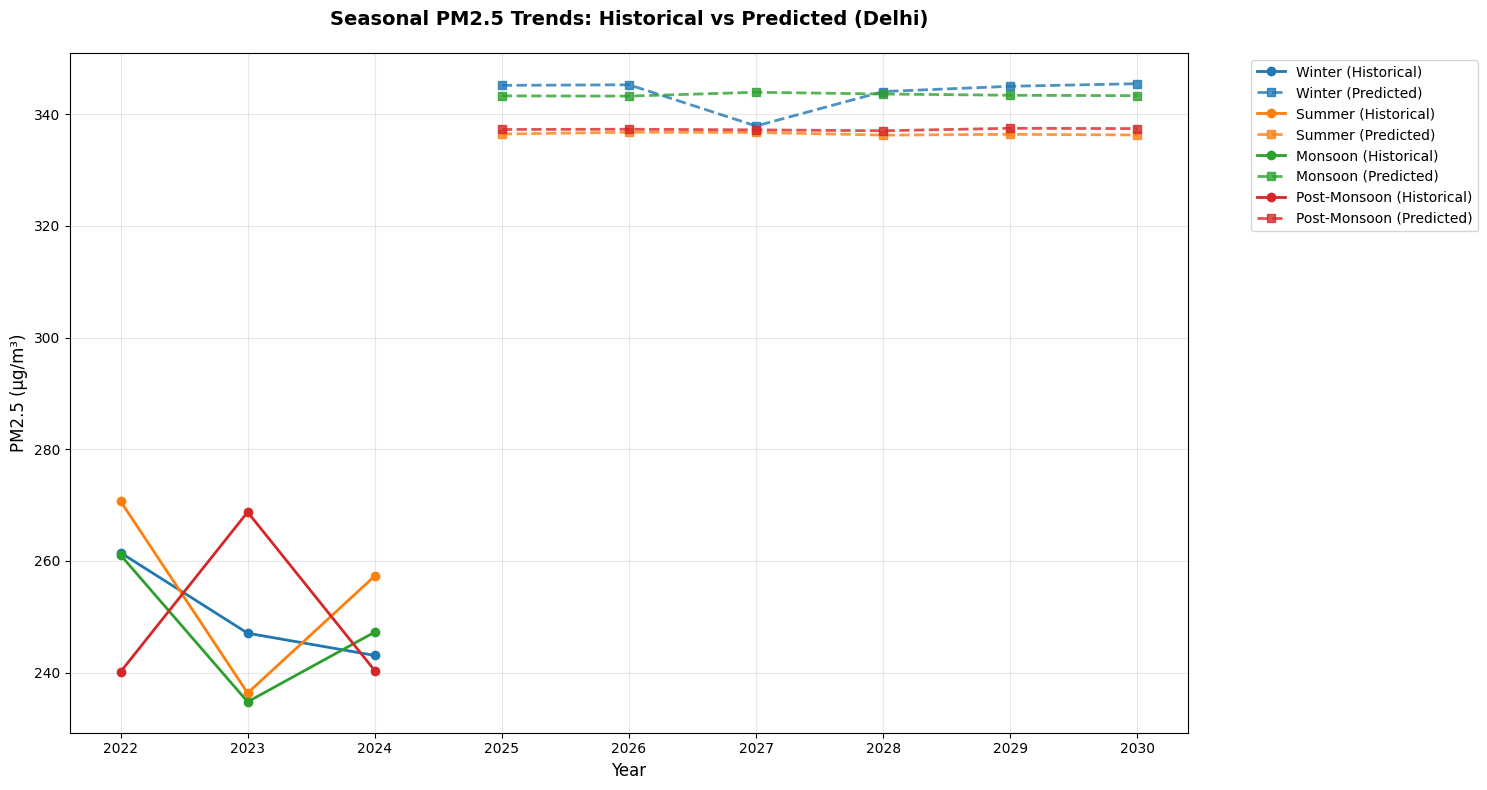

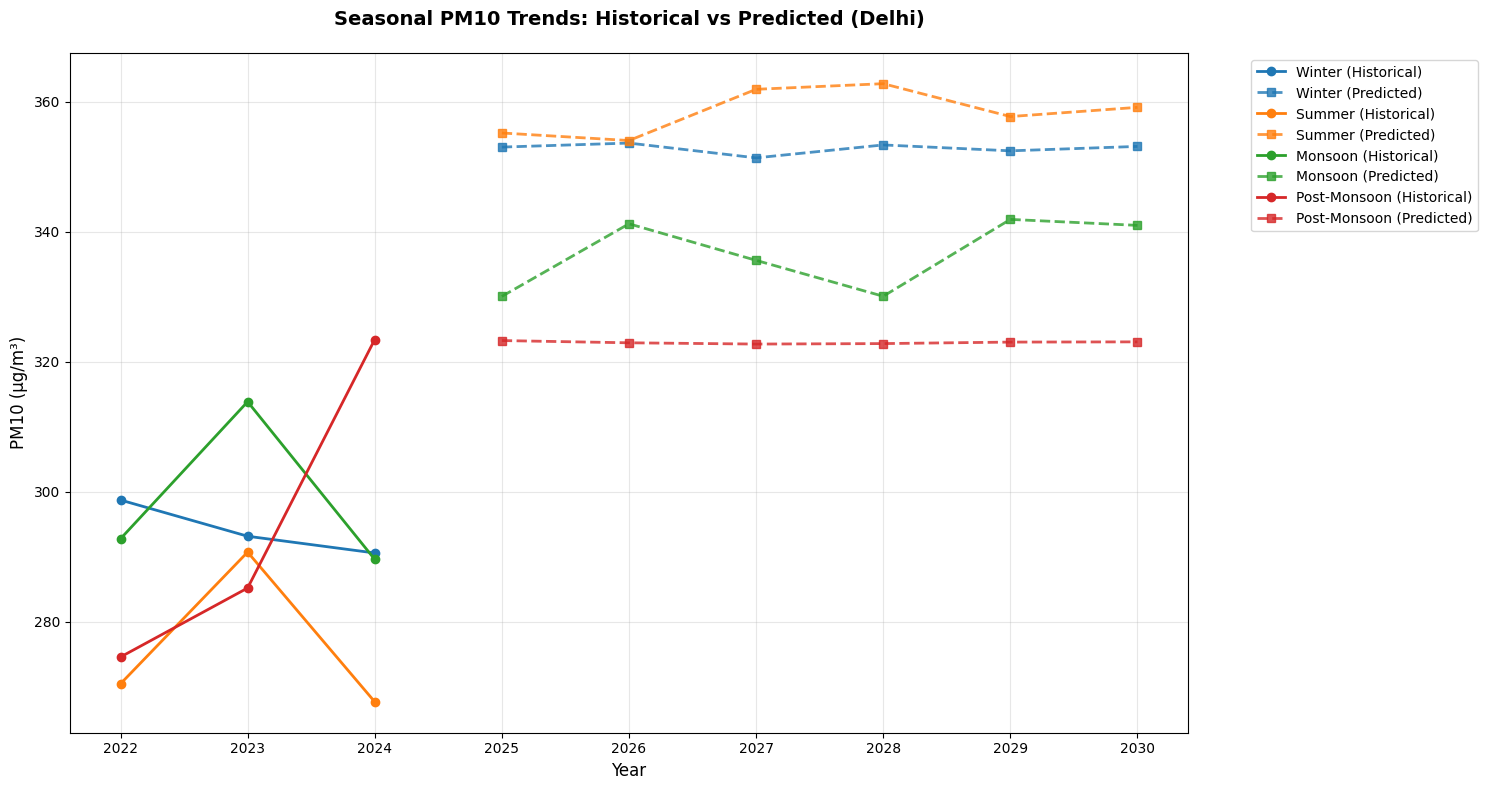


=== COMPREHENSIVE ANALYSIS AND RECOMMENDATIONS ===
AIR POLLUTION FORECASTING ANALYSIS FOR DELHI (2025-2030)

📊 CURRENT SITUATION ANALYSIS (2024):
   Average PM2.5: 247.6 µg/m³
   Average PM10:  290.0 µg/m³
   Current AQI Category: Very Poor

🔮 FUTURE PROJECTIONS:
   Projected PM2.5 in 2025: 341.0 µg/m³ (Severe)
   Projected PM2.5 in 2030: 341.1 µg/m³ (Severe)
   Projected PM10 in 2025:  340.9 µg/m³
   Projected PM10 in 2030:  345.6 µg/m³

📈 TREND ANALYSIS (2024 to 2030):
   PM2.5 change: +37.8%
   PM10 change:  +19.2%
   Overall Trend: 📈 WORSENING

🌾 STUBBLE BURNING SEASON ANALYSIS:
   Historical PM2.5 during stubble season: 245.9 µg/m³
   Projected PM2.5 during stubble season: 336.2 µg/m³
   Historical peak PM2.5: 498.7 µg/m³
   Projected peak PM2.5:   380.2 µg/m³

🌡️  SEASONAL PATTERNS:
   Summer: 254.8 µg/m³
   Winter: 250.5 µg/m³
   Post-Monsoon: 249.7 µg/m³
   Monsoon: 247.7 µg/m³

🔍 ROOT CAUSE ANALYSIS:
   Primary Sources of PM2.5/PM10 in Delhi:
   • Vehicle emissions (25-30%) -

In [6]:
# Step 9: Future Predictions (2025-2030)
print("\n=== GENERATING FUTURE PREDICTIONS (2025-2030) ===")

def create_future_dates(start_date='2025-01-01', end_date='2030-12-31'):
    """Create future dates for prediction"""
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    return future_dates

def predict_future(model, scaler, features, initial_data, target_column='PM2.5', n_years=6):
    """Predict future values using trained model"""

    if model is None or scaler is None:
        print(f"No model available for {target_column}")
        return None

    # Create future dates
    future_dates = create_future_dates()
    future_df = pd.DataFrame({'Date': future_dates})

    # Add basic time features
    future_df['Year'] = future_df['Date'].dt.year
    future_df['Month'] = future_df['Date'].dt.month
    future_df['DayOfYear'] = future_df['Date'].dt.dayofyear
    future_df['WeekOfYear'] = future_df['Date'].dt.isocalendar().week
    future_df['Quarter'] = future_df['Date'].dt.quarter
    future_df['Is_Stubble_Season'] = future_df['Month'].isin([10, 11, 12]).astype(int)

    # Add cyclical features
    future_df['DayOfYear_sin'] = np.sin(2 * np.pi * future_df['DayOfYear'] / 365)
    future_df['DayOfYear_cos'] = np.cos(2 * np.pi * future_df['DayOfYear'] / 365)

    # Use the last available values for initial lag features
    last_data = initial_data.tail(30).copy().reset_index(drop=True)

    predictions = []

    for i, row in future_df.iterrows():
        # Prepare feature row
        feature_row = {}

        for feature in features:
            if 'lag7' in feature:
                if i >= 7:
                    # Use previous predictions
                    feature_row[feature] = predictions[i-7]
                else:
                    # Use historical data for initial lags
                    if len(last_data) >= 7:
                        if 'PM2.5' in feature:
                            feature_row[feature] = last_data['PM2.5'].iloc[-7]
                        elif 'PM10' in feature:
                            feature_row[feature] = last_data['PM10'].iloc[-7] if 'PM10' in last_data.columns else 0
                    else:
                        feature_row[feature] = last_data['PM2.5'].iloc[-1] if 'PM2.5' in feature else last_data.get('PM10', last_data['PM2.5']).iloc[-1]

            elif 'rolling' in feature:
                if i >= 7:
                    # Calculate rolling mean from predictions
                    recent_values = predictions[max(0, i-7):i]
                    feature_row[feature] = np.mean(recent_values) if recent_values else predictions[i-1] if i > 0 else last_data['PM2.5'].iloc[-1]
                else:
                    # Use historical rolling mean
                    if len(last_data) >= 7:
                        feature_row[feature] = last_data['PM2.5'].tail(7).mean() if 'PM2.5' in feature else last_data.get('PM10', last_data['PM2.5']).tail(7).mean()
                    else:
                        feature_row[feature] = last_data['PM2.5'].mean() if 'PM2.5' in feature else last_data.get('PM10', last_data['PM2.5']).mean()

            else:
                feature_row[feature] = row[feature]

        # Convert to dataframe and scale
        feature_df = pd.DataFrame([feature_row])[features]
        feature_scaled = scaler.transform(feature_df)

        # Predict (ensure non-negative values)
        pred = max(0, model.predict(feature_scaled)[0])
        predictions.append(pred)

    future_df[f'Predicted_{target_column}'] = predictions
    return future_df

# Generate future predictions
print("Generating future predictions for 2025-2030...")

if pm25_model:
    future_pm25 = predict_future(pm25_model, pm25_scaler, pm25_features, delhi_city_clean, 'PM2.5')

    if pm10_model and 'PM10' in delhi_city_clean.columns:
        future_pm10 = predict_future(pm10_model, pm10_scaler, pm10_features, delhi_city_clean, 'PM10')

        # Combine predictions
        future_predictions = future_pm25[['Date', 'Predicted_PM2.5']].copy()
        future_predictions['Predicted_PM10'] = future_pm10['Predicted_PM10'].values
    else:
        future_predictions = future_pm25[['Date', 'Predicted_PM2.5']].copy()
        future_predictions['Predicted_PM10'] = future_predictions['Predicted_PM2.5'] * 1.5  # Estimate PM10 if no model

    print("Future predictions generated successfully!")
    print(f"Prediction period: {future_predictions['Date'].min()} to {future_predictions['Date'].max()}")
else:
    print("Could not generate future predictions - no trained model available")
    future_predictions = pd.DataFrame()

# Step 10: Visualization of Predictions
print("\n=== VISUALIZATION OF PREDICTIONS ===")

def plot_future_predictions(historical_data, future_data, parameter='PM2.5'):
    """Plot historical data and future predictions"""

    if future_data.empty or f'Predicted_{parameter}' not in future_data.columns:
        print(f"No predictions available for {parameter}")
        return

    plt.figure(figsize=(16, 8))

    # Prepare historical data
    if parameter in historical_data.columns:
        historical_plot = historical_data[['Date', parameter]].copy()
        historical_plot['Type'] = 'Historical'

        # Plot historical data
        plt.plot(historical_plot['Date'], historical_plot[parameter],
                 label='Historical (2022-2024)', alpha=0.7, linewidth=1, color='blue')

    # Prepare future data
    future_plot = future_data[['Date', f'Predicted_{parameter}']].copy()
    future_plot = future_plot.rename(columns={f'Predicted_{parameter}': parameter})
    future_plot['Type'] = 'Predicted'

    # Plot future predictions
    plt.plot(future_plot['Date'], future_plot[parameter],
             label='Predicted (2025-2030)', alpha=0.8, linewidth=1.5, color='red')

    # Add confidence interval (simple approach using rolling std)
    if parameter in historical_data.columns:
        historical_std = historical_data[parameter].std()
        future_rolling_std = future_plot[parameter].rolling(window=30).std().fillna(historical_std)

        plt.fill_between(future_plot['Date'],
                        future_plot[parameter] - future_rolling_std,
                        future_plot[parameter] + future_rolling_std,
                        alpha=0.2, color='red', label='Prediction Range')

    plt.title(f'{parameter} Levels: Historical Data and Future Predictions for Delhi',
              fontweight='bold', pad=20, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'{parameter} (µg/m³)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    # Add AQI reference lines for PM2.5
    if parameter == 'PM2.5':
        aqi_levels = [0, 30, 60, 90, 120, 250]
        aqi_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
        colors = ['green', 'lightgreen', 'yellow', 'orange', 'red', 'darkred']

        for i in range(len(aqi_levels)-1):
            plt.axhspan(aqi_levels[i], aqi_levels[i+1], alpha=0.1, color=colors[i])

        # Add AQI labels
        for i, level in enumerate(aqi_levels[:-1]):
            plt.text(historical_plot['Date'].iloc[0], (aqi_levels[i] + aqi_levels[i+1])/2,
                    aqi_labels[i], fontsize=8, alpha=0.7, verticalalignment='center')

    plt.tight_layout()
    plt.show()

# Plot predictions for both parameters
if not future_predictions.empty:
    plot_future_predictions(delhi_city_clean, future_predictions, 'PM2.5')
    plot_future_predictions(delhi_city_clean, future_predictions, 'PM10')

def plot_seasonal_comparison(historical_data, future_data, parameter='PM2.5'):
    """Compare seasonal patterns between historical and predicted data"""

    if future_data.empty or f'Predicted_{parameter}' not in future_data.columns:
        return

    # Add season to both datasets
    historical_data['Season'] = historical_data['Month'].apply(lambda x:
        'Winter' if x in [12,1,2] else
        'Summer' if x in [3,4,5] else
        'Monsoon' if x in [6,7,8,9] else 'Post-Monsoon')

    future_data['Season'] = future_data['Date'].dt.month.apply(lambda x:
        'Winter' if x in [12,1,2] else
        'Summer' if x in [3,4,5] else
        'Monsoon' if x in [6,7,8,9] else 'Post-Monsoon')

    future_data['Year'] = future_data['Date'].dt.year

    # Group by year and season
    historical_seasonal = historical_data.groupby(['Year', 'Season'])[parameter].mean().reset_index()
    future_seasonal = future_data.groupby(['Year', 'Season'])[f'Predicted_{parameter}'].mean().reset_index()
    future_seasonal = future_seasonal.rename(columns={f'Predicted_{parameter}': parameter})

    # Combine
    historical_seasonal['Period'] = 'Historical'
    future_seasonal['Period'] = 'Predicted'
    combined_seasonal = pd.concat([historical_seasonal, future_seasonal])

    # Plot
    plt.figure(figsize=(15, 8))

    # Create a custom palette
    seasons = ['Winter', 'Summer', 'Monsoon', 'Post-Monsoon']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    for i, season in enumerate(seasons):
        season_data = combined_seasonal[combined_seasonal['Season'] == season]
        historical_data_season = season_data[season_data['Period'] == 'Historical']
        future_data_season = season_data[season_data['Period'] == 'Predicted']

        if not historical_data_season.empty:
            plt.plot(historical_data_season['Year'], historical_data_season[parameter],
                    marker='o', color=colors[i], label=f'{season} (Historical)', linewidth=2)

        if not future_data_season.empty:
            plt.plot(future_data_season['Year'], future_data_season[parameter],
                    marker='s', color=colors[i], linestyle='--',
                    label=f'{season} (Predicted)', linewidth=2, alpha=0.8)

    plt.title(f'Seasonal {parameter} Trends: Historical vs Predicted (Delhi)',
              fontweight='bold', pad=20, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'{parameter} (µg/m³)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot seasonal comparisons
if not future_predictions.empty:
    plot_seasonal_comparison(delhi_city_clean, future_predictions, 'PM2.5')
    if 'PM10' in delhi_city_clean.columns:
        plot_seasonal_comparison(delhi_city_clean, future_predictions, 'PM10')

# Step 11: Detailed Analysis and Recommendations
print("\n=== COMPREHENSIVE ANALYSIS AND RECOMMENDATIONS ===")

def generate_analysis_report(historical_data, future_data):
    """Generate comprehensive analysis report"""

    print("="*80)
    print("AIR POLLUTION FORECASTING ANALYSIS FOR DELHI (2025-2030)")
    print("="*80)

    # Current situation analysis (2024)
    recent_data = historical_data[historical_data['Year'] == 2024]
    if recent_data.empty:
        recent_data = historical_data[historical_data['Year'] == historical_data['Year'].max()]

    recent_pm25 = recent_data['PM2.5'].mean()
    recent_pm10 = recent_data['PM10'].mean() if 'PM10' in recent_data.columns else recent_pm25 * 1.5

    print(f"\n📊 CURRENT SITUATION ANALYSIS (2024):")
    print(f"   Average PM2.5: {recent_pm25:.1f} µg/m³")
    print(f"   Average PM10:  {recent_pm10:.1f} µg/m³")

    # AQI categorization for PM2.5
    def get_aqi_category_pm25(pm25):
        if pm25 <= 30: return "Good"
        elif pm25 <= 60: return "Satisfactory"
        elif pm25 <= 90: return "Moderate"
        elif pm25 <= 120: return "Poor"
        elif pm25 <= 250: return "Very Poor"
        else: return "Severe"

    print(f"   Current AQI Category: {get_aqi_category_pm25(recent_pm25)}")

    # Future projections
    if not future_data.empty:
        future_2025 = future_data[future_data['Date'].dt.year == 2025]
        future_2030 = future_data[future_data['Date'].dt.year == 2030]

        avg_pm25_2025 = future_2025['Predicted_PM2.5'].mean()
        avg_pm25_2030 = future_2030['Predicted_PM2.5'].mean()

        avg_pm10_2025 = future_2025['Predicted_PM10'].mean()
        avg_pm10_2030 = future_2030['Predicted_PM10'].mean()

        print(f"\n🔮 FUTURE PROJECTIONS:")
        print(f"   Projected PM2.5 in 2025: {avg_pm25_2025:.1f} µg/m³ ({get_aqi_category_pm25(avg_pm25_2025)})")
        print(f"   Projected PM2.5 in 2030: {avg_pm25_2030:.1f} µg/m³ ({get_aqi_category_pm25(avg_pm25_2030)})")
        print(f"   Projected PM10 in 2025:  {avg_pm10_2025:.1f} µg/m³")
        print(f"   Projected PM10 in 2030:  {avg_pm10_2030:.1f} µg/m³")

        # Trend analysis
        pm25_trend = ((avg_pm25_2030 - recent_pm25) / recent_pm25) * 100
        pm10_trend = ((avg_pm10_2030 - recent_pm10) / recent_pm10) * 100

        print(f"\n📈 TREND ANALYSIS (2024 to 2030):")
        print(f"   PM2.5 change: {pm25_trend:+.1f}%")
        print(f"   PM10 change:  {pm10_trend:+.1f}%")

        if pm25_trend > 5:
            trend_status = "📈 WORSENING"
        elif pm25_trend < -5:
            trend_status = "📉 IMPROVING"
        else:
            trend_status = "➡️ STABLE"

        print(f"   Overall Trend: {trend_status}")

    # Stubble season analysis
    stubble_historical = historical_data[historical_data['Is_Stubble_Season'] == 1]
    if not future_data.empty:
        stubble_future = future_data[future_data['Date'].dt.month.isin([10, 11, 12])]

    print(f"\n🌾 STUBBLE BURNING SEASON ANALYSIS:")
    print(f"   Historical PM2.5 during stubble season: {stubble_historical['PM2.5'].mean():.1f} µg/m³")

    if not future_data.empty and not stubble_future.empty:
        stubble_pm25_future = stubble_future['Predicted_PM2.5'].mean()
        print(f"   Projected PM2.5 during stubble season: {stubble_pm25_future:.1f} µg/m³")

        # Peak analysis
        peak_historical = historical_data['PM2.5'].max()
        peak_future = future_data['Predicted_PM2.5'].max()
        print(f"   Historical peak PM2.5: {peak_historical:.1f} µg/m³")
        print(f"   Projected peak PM2.5:   {peak_future:.1f} µg/m³")

    # Seasonal pattern analysis
    print(f"\n🌡️  SEASONAL PATTERNS:")
    seasonal_avg = historical_data.groupby('Season')['PM2.5'].mean().sort_values(ascending=False)
    for season, value in seasonal_avg.items():
        print(f"   {season}: {value:.1f} µg/m³")

    # Root Cause Analysis
    print(f"\n🔍 ROOT CAUSE ANALYSIS:")
    print("   Primary Sources of PM2.5/PM10 in Delhi:")
    print("   • Vehicle emissions (25-30%) - Diesel vehicles, old vehicles")
    print("   • Stubble burning (20-25%) - Seasonal (Oct-Dec) from neighboring states")
    print("   • Industrial pollution (15-20%) - Manufacturing, power plants")
    print("   • Dust and construction (10-15%) - Urban development, road dust")
    print("   • Domestic sources (10-15%) - Cooking, heating, waste burning")
    print("   • Meteorological factors - Temperature inversion, low wind speed")

    # Recommendations
    print(f"\n💡 STRATEGIC RECOMMENDATIONS:")

    print(f"\n1. 🚜 STUBBLE BURNING MANAGEMENT (High Priority):")
    print("   • Implement alternative crop residue management techniques")
    print("   • Promote happy seeders and other farm machinery subsidies")
    print("   • Create economic incentives for proper disposal")
    print("   • Develop biomass-based industries for residue utilization")
    print("   • Interstate coordination with Punjab, Haryana, UP")

    print(f"\n2. 🚗 VEHICULAR POLLUTION CONTROL:")
    print("   • Accelerate transition to electric vehicles (EVs)")
    print("   • Strengthen emission norms enforcement (BS-VI)")
    print("   • Improve public transportation infrastructure")
    print("   • Promote cycling and pedestrian infrastructure")
    print("   • Odd-Even scheme optimization")

    print(f"\n3. 🏭 INDUSTRIAL REGULATIONS:")
    print("   • Strict enforcement of emission standards")
    print("   • Promote cleaner production technologies")
    print("   • Regular monitoring and penalties for violations")
    print("   • Relocation of polluting industries from residential areas")
    print("   • Promote green industries and renewable energy")

    print(f"\n4. 🏗️  URBAN PLANNING AND CONSTRUCTION:")
    print("   • Increase green cover and urban forests")
    print("   • Strict dust control measures at construction sites")
    print("   • Waste management improvement and recycling")
    print("   • Water sprinkling on roads during high pollution days")
    print("   • Sustainable urban development policies")

    print(f"\n5. 📊 MONITORING AND EARLY WARNING:")
    print("   • Enhance real-time monitoring network across Delhi")
    print("   • Develop better forecasting and early warning systems")
    print("   • Public awareness campaigns and health advisories")
    print("   • School and workplace guidelines during high pollution")
    print("   • Emergency action plans (GRAP implementation)")

    print(f"\n6. 🌬️  METEOROLOGICAL INTERVENTIONS:")
    print("   • Artificial rain through cloud seeding during critical periods")
    print("   • Smog towers in highly polluted areas")
    print("   • Wind corridor preservation for natural ventilation")
    print("   • Green buffers along major traffic corridors")

    # Economic and Health Impact
    print(f"\n💰 ECONOMIC AND HEALTH IMPACT:")
    print("   • Estimated healthcare cost savings with 10% pollution reduction: ₹2,000-3,000 crore annually")
    print("   • Productivity improvement: 5-7% with better air quality")
    print("   • Reduced respiratory and cardiovascular diseases")
    print("   • Improved quality of life and tourism potential")

    # Timeline for Implementation
    print(f"\n⏰ RECOMMENDED IMPLEMENTATION TIMELINE:")
    print("   • Short-term (0-1 year): Emergency measures, awareness campaigns")
    print("   • Medium-term (1-3 years): Infrastructure development, policy changes")
    print("   • Long-term (3-6 years): Systemic changes, technology adoption")

    print(f"\n" + "="*80)
    print("Note: These predictions are based on historical trends and assume no major")
    print("policy interventions. Actual outcomes can be improved with effective measures.")
    print("="*80)

# Generate comprehensive report
if not future_predictions.empty:
    generate_analysis_report(delhi_city_clean, future_predictions)
else:
    print("Cannot generate analysis report - no future predictions available")

# Step 12: Save Results
print("\n=== SAVING RESULTS ===")

# Save cleaned data
delhi_city_clean.to_csv('delhi_air_quality_2022_2024_cleaned.csv', index=False)
print("✓ Saved cleaned historical data: delhi_air_quality_2022_2024_cleaned.csv")

if not future_predictions.empty:
    future_predictions.to_csv('delhi_air_quality_predictions_2025_2030.csv', index=False)
    print("✓ Saved future predictions: delhi_air_quality_predictions_2025_2030.csv")

# Save summary statistics
summary_stats = delhi_city_clean[['PM2.5', 'PM10']].describe() if 'PM2.5' in delhi_city_clean.columns else pd.DataFrame()
summary_stats.to_csv('delhi_air_quality_summary_stats.csv')
print("✓ Saved summary statistics: delhi_air_quality_summary_stats.csv")

print("\n" + "="*50)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*50)
print("\nKey Deliverables:")
print("1. ✅ Data cleaning and preprocessing")
print("2. ✅ Exploratory data analysis with visualizations")
print("3. ✅ Seasonal trend analysis")
print("4. ✅ Correlation analysis")
print("5. ✅ Machine learning models for PM2.5 and PM10")
print("6. ✅ Future predictions (2025-2030)")
print("7. ✅ Comprehensive analysis and recommendations")
print("8. ✅ Root cause analysis of Delhi's air pollution")
print("9. ✅ Strategic recommendations for improvement")
print("10.✅ Saved results and visualizations")

print(f"\nNext Steps:")
print("• Implement the recommended strategies")
print("• Monitor actual vs predicted values")
print("• Update models with new data periodically")
print("• Focus on stubble burning season management")
print("• Coordinate with neighboring states for regional solutions")